In [16]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import math

In [17]:
r = 3

In [18]:
df = pd.read_feather("./outputs/Latent_output.feather")
df

,lncRNA,diease,Algorithmic Value
0,NONHSAT000002.2,Abortion habitual,1.591137
1,NONHSAT000002.2,Acoustic neuroma,1.639681
2,NONHSAT000002.2,Acquired immunodeficiency syndrome,1.710313
3,NONHSAT000002.2,Acute coronary syndrome,1.642922
4,NONHSAT000002.2,Acute kidney failure,1.639706
...,...,...,...
3882751,NONHSAT007829.2,Childhood medulloblastoma,0.415320
3882752,NONHSAT007829.2,Differentiating neuroblastoma,0.415306
3882753,NONHSAT007829.2,Ganglioneuroblastoma,0.415556
3882754,NONHSAT007829.2,Ganglioneuroma,0.415369


In [19]:
index = df['Algorithmic Value'].argsort()
intial_ranks = np.zeros_like(df['Algorithmic Value'],dtype=int)
for i,a in enumerate(index):
    intial_ranks[a] = len(intial_ranks) - i
df['Intial Ranking'] = intial_ranks
df

,lncRNA,diease,Algorithmic Value,Intial Ranking
0,NONHSAT000002.2,Abortion habitual,1.591137,760079
1,NONHSAT000002.2,Acoustic neuroma,1.639681,716446
2,NONHSAT000002.2,Acquired immunodeficiency syndrome,1.710313,656280
3,NONHSAT000002.2,Acute coronary syndrome,1.642922,713614
4,NONHSAT000002.2,Acute kidney failure,1.639706,716419
...,...,...,...,...
3882751,NONHSAT007829.2,Childhood medulloblastoma,0.415320,2631844
3882752,NONHSAT007829.2,Differentiating neuroblastoma,0.415306,2631893
3882753,NONHSAT007829.2,Ganglioneuroblastoma,0.415556,2631390
3882754,NONHSAT007829.2,Ganglioneuroma,0.415369,2631776


In [20]:
val = df['Algorithmic Value'].copy()
val

0          1.591137
1          1.639681
2          1.710313
3          1.642922
4          1.639706
             ...   
3882751    0.415320
3882752    0.415306
3882753    0.415556
3882754    0.415369
3882755    0.513868
Name: Algorithmic Value, Length: 3882756, dtype: float64

In [21]:
df['Algorithmic Value'].max(),df['Algorithmic Value'].min(),df['Algorithmic Value'].max()-df['Algorithmic Value'].min(),df['Algorithmic Value'].std()

(329.6302410451272,
 -0.09867926740107609,
 329.72892031252826,
 1.114332078355471)

number of values higher than 3 is 63759


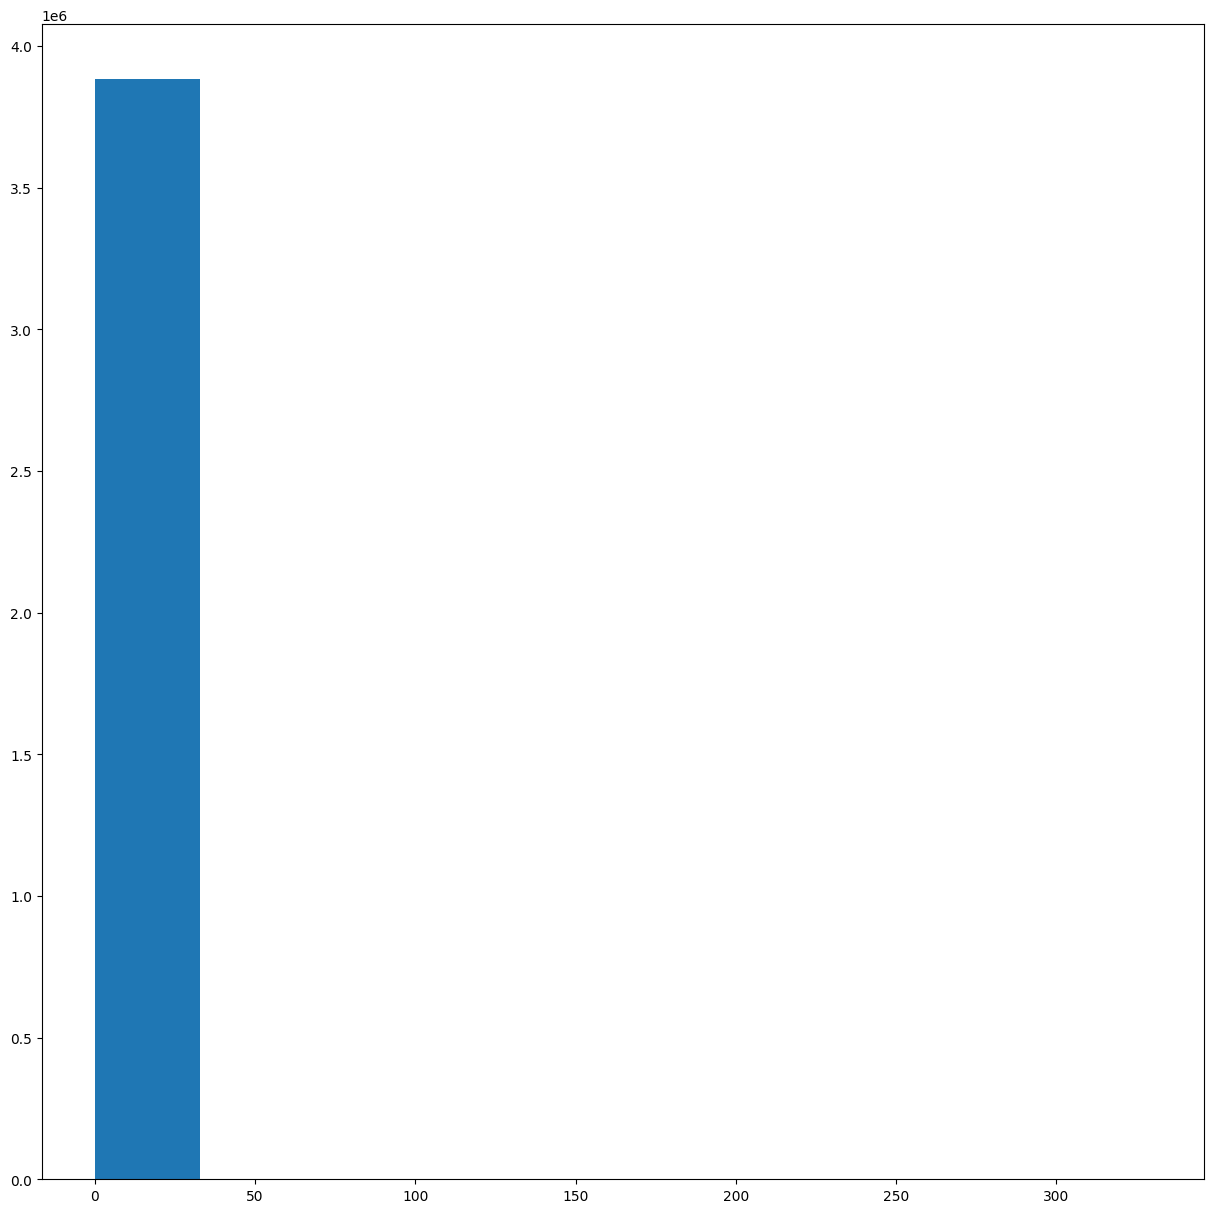

In [22]:
rang = 2
k = {i:0 for i in range(0,round(df['Algorithmic Value'].max())+10,rang)}
k[-1] = 0
key = sorted(k.keys())
for a in df['Algorithmic Value']:
    for b in range(1,len(k.keys())):
        if key[b-1]<= a < key[b]:
            k[key[b-1]] += 1
            break
c = 0
for a in k.items():
    if a[0] > r:
        c+=a[1]
# Plot the line graph
print(f"number of values higher than {r} is",c)
plt.figure(figsize=(15, 15))
plt.hist(df['Algorithmic Value'])
plt.show()

In [23]:
df['SCALED'] = df['Algorithmic Value'].copy()

In [24]:
df.loc[df['SCALED'] > r, 'SCALED'] = r + df.loc[df['SCALED'] > r, 'SCALED']/1000

In [25]:
df['SCALED'].max(),df['SCALED'].min(),df['SCALED'].max()-df['SCALED'].min(),df['SCALED'].std()

(3.3296302410451273,
 -0.09867926740107609,
 3.4283095084462034,
 0.7882158418659069)

In [29]:
k = df['SCALED'].copy()
d = 1/(k.max()-k.min())
min_ = k.min()
for i in range(len(k)):
    k[i] = (k[i]-min_)*d 
df['Normalized Value'] = k
k

0          0.492901
1          0.507061
2          0.527663
3          0.508006
4          0.507068
             ...   
3882751    0.149928
3882752    0.149924
3882753    0.149997
3882754    0.149942
3882755    0.178673
Name: SCALED, Length: 3882756, dtype: float64

In [30]:
final_index = df['Normalized Value'].argsort()
final_ranks = np.zeros_like(df['Normalized Value'],dtype=int)
for i,a in enumerate(final_index):
    final_ranks[a] = len(final_ranks) - i
df['Final Ranking'] = final_ranks
df

,lncRNA,diease,Algorithmic Value,Intial Ranking,SCALED,Normalized Value,Final Ranking
0,NONHSAT000002.2,Abortion habitual,1.591137,760079,1.591137,0.492901,760079
1,NONHSAT000002.2,Acoustic neuroma,1.639681,716446,1.639681,0.507061,716446
2,NONHSAT000002.2,Acquired immunodeficiency syndrome,1.710313,656280,1.710313,0.527663,656280
3,NONHSAT000002.2,Acute coronary syndrome,1.642922,713614,1.642922,0.508006,713614
4,NONHSAT000002.2,Acute kidney failure,1.639706,716419,1.639706,0.507068,716419
...,...,...,...,...,...,...,...
3882751,NONHSAT007829.2,Childhood medulloblastoma,0.415320,2631844,0.415320,0.149928,2631844
3882752,NONHSAT007829.2,Differentiating neuroblastoma,0.415306,2631893,0.415306,0.149924,2631893
3882753,NONHSAT007829.2,Ganglioneuroblastoma,0.415556,2631390,0.415556,0.149997,2631390
3882754,NONHSAT007829.2,Ganglioneuroma,0.415369,2631776,0.415369,0.149942,2631776


In [31]:
all(df['Intial Ranking'] == df['Final Ranking'])

True

In [32]:
df

,lncRNA,diease,Algorithmic Value,Intial Ranking,SCALED,Normalized Value,Final Ranking
0,NONHSAT000002.2,Abortion habitual,1.591137,760079,1.591137,0.492901,760079
1,NONHSAT000002.2,Acoustic neuroma,1.639681,716446,1.639681,0.507061,716446
2,NONHSAT000002.2,Acquired immunodeficiency syndrome,1.710313,656280,1.710313,0.527663,656280
3,NONHSAT000002.2,Acute coronary syndrome,1.642922,713614,1.642922,0.508006,713614
4,NONHSAT000002.2,Acute kidney failure,1.639706,716419,1.639706,0.507068,716419
...,...,...,...,...,...,...,...
3882751,NONHSAT007829.2,Childhood medulloblastoma,0.415320,2631844,0.415320,0.149928,2631844
3882752,NONHSAT007829.2,Differentiating neuroblastoma,0.415306,2631893,0.415306,0.149924,2631893
3882753,NONHSAT007829.2,Ganglioneuroblastoma,0.415556,2631390,0.415556,0.149997,2631390
3882754,NONHSAT007829.2,Ganglioneuroma,0.415369,2631776,0.415369,0.149942,2631776


In [ ]:
df.to_csv("./outputs/Latent_Normalized.csv",index=False)

In [ ]:
df.to_feather("./outputs/Latent_Normalized.feather")

In [ ]:
k = pd.read_csv("./outputs/Latent_Normalized.csv")
k

,lncRNA,diease,Algorithmic Value,Intial Ranking,SCALED,Normalized value,Final Ranking
0,NONHSAT000002.2,Abortion habitual,1.591137,2802229,1.591137,0.492901,2802229
1,NONHSAT000002.2,Acoustic neuroma,1.639681,2802225,1.639681,0.507061,2802225
2,NONHSAT000002.2,Acquired immunodeficiency syndrome,1.710313,2802279,1.710313,0.527663,2802279
3,NONHSAT000002.2,Acute coronary syndrome,1.642922,2802254,1.642922,0.508006,2802254
4,NONHSAT000002.2,Acute kidney failure,1.639706,2802251,1.639706,0.507068,2802251
...,...,...,...,...,...,...,...
3882751,NONHSAT007829.2,Childhood medulloblastoma,0.415320,3880460,0.415320,0.149928,3880460
3882752,NONHSAT007829.2,Differentiating neuroblastoma,0.415306,3881488,0.415306,0.149924,3881488
3882753,NONHSAT007829.2,Ganglioneuroblastoma,0.415556,3882512,0.415556,0.149997,3882512
3882754,NONHSAT007829.2,Ganglioneuroma,0.415369,3882002,0.415369,0.149942,3882002
